<a href="https://colab.research.google.com/github/Magartej/crime-data-nepal-analysis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparative Analysis for Crime in Nepal Classification

## Introduction

The notebook is based on the data from Open Nepal Data, and the direct URL to the dataset is https://opendatanepal.com/dataset/five-yearly-average-2005-06-2009-10-number-of-crime-cases-conviction-rates-and-pending-rates.
The dataset consists of 16 samples with nine attributes: fiscal year, rape, attempt rape, trafficking, abortion, polygamy, child marriage and violence.

* Objective:
   -  To analyze how cases of domestic violence have changed from 1996 onwards and identify any patterns or significant shifts.
   - To examine the relationship between reported rape and abortion cases to determine if a statistical correlation exists between these two crime types.

In [2]:
#importing the google colab form drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# importing necessary libraries

import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import scipy.stats as stats # for implementing skewness and other stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes


In [4]:
# first read the data file

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crime - work .csv")

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.


In [5]:
df.shape #quickly understanding the size of your dataset (row, column)

(15, 9)

In [6]:
# printing the data
df

,Fiscal Year,Rape,Attempt rape,Trafficking,Abortion,Polygamy,Child marriage,Domestic violence,Total
0,1996,112,34,117,74,101,5,337,780
1,1997,181,34,130,101,135,3,228,812
2,1998,141,18,110,81,96,1,432,879
3,1999,186,33,120,89,96,5,711,1240
4,2000,122,35,92,55,75,1,449,829
5,2001,129,21,40,14,51,0,410,665
6,2002,157,18,55,15,69,2,569,885
7,2003,154,19,56,8,44,3,922,1206
8,2004,188,25,72,11,66,1,730,1093
9,2005,195,38,97,14,65,1,939,1349


15 rows x 9 columns

In [7]:
df.head() #it show only the top 5 rows

,Fiscal Year,Rape,Attempt rape,Trafficking,Abortion,Polygamy,Child marriage,Domestic violence,Total
0,1996,112,34,117,74,101,5,337,780
1,1997,181,34,130,101,135,3,228,812
2,1998,141,18,110,81,96,1,432,879
3,1999,186,33,120,89,96,5,711,1240
4,2000,122,35,92,55,75,1,449,829


we see that this data do not contain any missing value

we are good to go for EDA Cycle

Lets summarize the central tendency, dispersion and shape of dataset distribution

In [8]:
# Print summary statistics
df.describe()

,Fiscal Year,Rape,Attempt rape,Trafficking,Abortion,Polygamy,Child marriage,Total
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2003.000000,212.733333,44.133333,99.866667,33.733333,95.066667,2.933333,1176.533333
std,4.472136,92.088829,26.196692,34.535420,35.220665,35.805959,2.218966,377.109091
min,1996.000000,112.000000,18.000000,40.000000,3.000000,44.000000,0.000000,665.000000
25%,1999.500000,147.500000,23.000000,73.000000,9.500000,67.500000,1.000000,854.000000
50%,2003.000000,186.000000,34.000000,110.000000,14.000000,96.000000,2.000000,1143.000000
75%,2006.500000,271.000000,69.000000,121.500000,64.500000,111.500000,4.500000,1437.000000
max,2010.000000,391.000000,101.000000,161.000000,101.000000,170.000000,7.000000,1782.000000




* No messing data as all numerical consums 15 data
* Mean rape case is 112
* Max rape case is 391
* Average attempt rape case is 18



In [9]:
# the complete information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fiscal Year        15 non-null     int64 
 1   Rape               15 non-null     int64 
 2   Attempt rape       15 non-null     int64 
 3   Trafficking        15 non-null     int64 
 4   Abortion           15 non-null     int64 
 5   Polygamy           15 non-null     int64 
 6   Child marriage     15 non-null     int64 
 7   Domestic violence  15 non-null     object
 8   Total              15 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ KB


In [10]:
#columns name
df.columns

Index(['Fiscal Year', 'Rape', 'Attempt rape', 'Trafficking', 'Abortion',
       'Polygamy', 'Child marriage', 'Domestic violence', 'Total'],
      dtype='object')

In [11]:
#Checking Null
# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.nan)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())



0
0


* Dataset contains 15 records with 9 features
* Memory usages if 1.2+ KB whish is easy to process on local machine
* The data seems to  be clean with zero missing values
* 1 columns is object and rest are  int64


Now we will be creating the copy of data so that we avoid the mistake of modifying the data

In [12]:
# Create a copy of the DataFrame to avoid modifying the original data
df2 = df.copy()

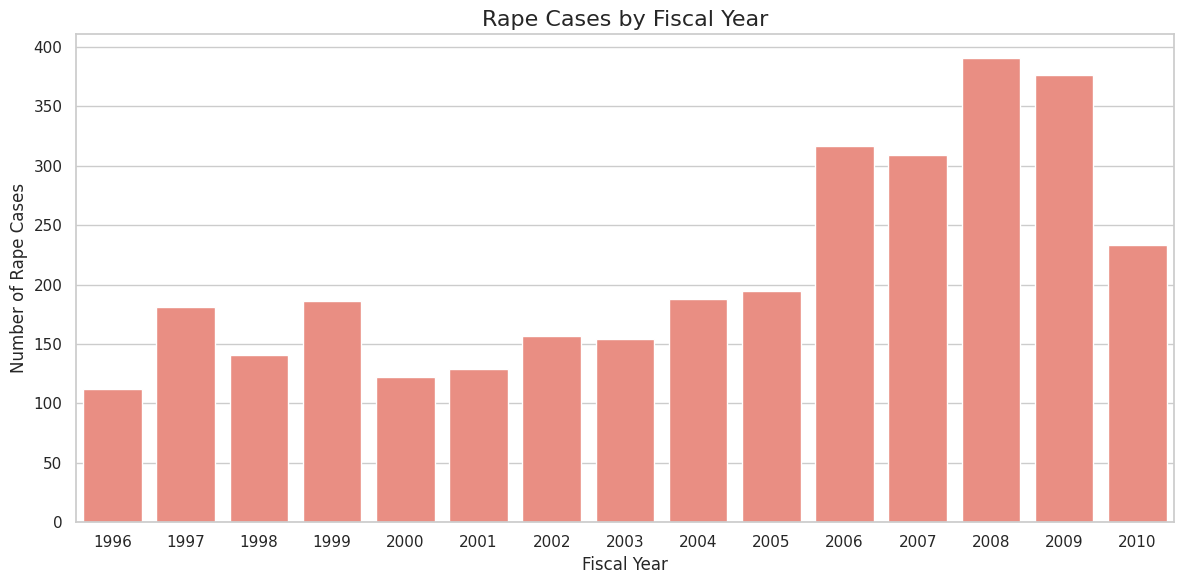

In [44]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Fiscal Year", y="Rape", data=df, color="salmon")

# Customize plot
plt.title("Rape Cases by Fiscal Year", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Number of Rape Cases", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* In 2008 there is high rape case that is 391.
* In 1996 there is low rape case that is 112.

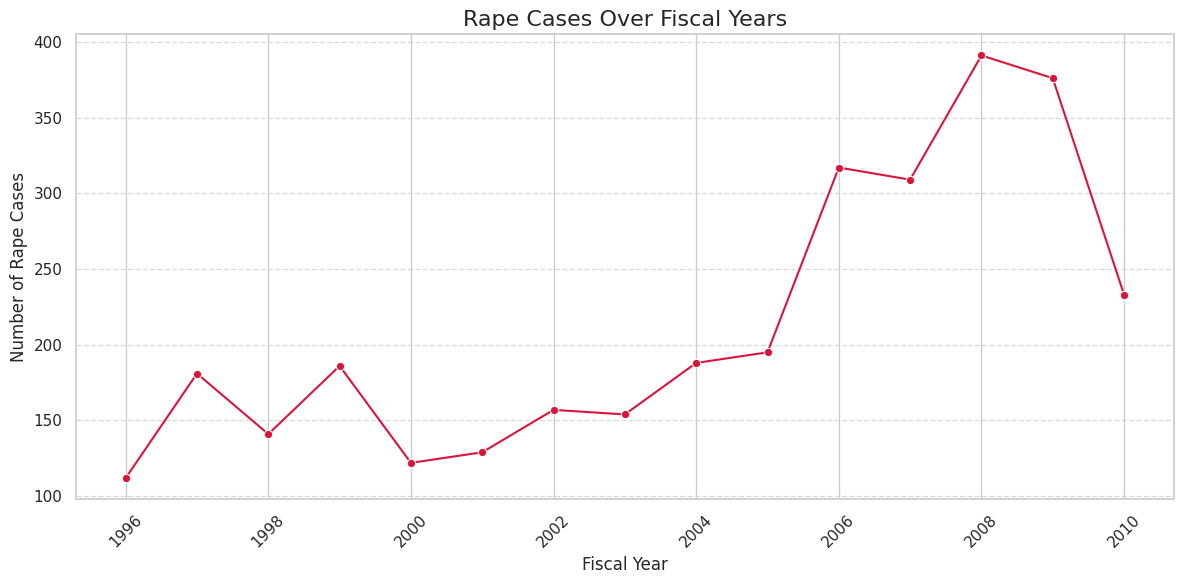

In [49]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Fiscal Year", y="Rape", data=df, marker='o', color='crimson')

# Add labels and title
plt.title("Rape Cases Over Fiscal Years", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Number of Rape Cases", fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [50]:
# Count the number of occurrences of each unique value in the 'Result' column
rape_data = df2[['Rape', 'Attempt rape']].sum()
rape_data.index = ['Rape', 'Attempt rape']

# Print the counts of the two categories
print(rape_data)

# Check if the two categories are balanced or not
if rape_data[0] == rape_data[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')

print("-----")

# The classes are heavily skewed we need to solve this issue later.

total = rape_data.sum()
print('Rape', round(rape_data['Rape'] / total * 100, 2), '% of the dataset')
print('Attempt rape', round(rape_data['Attempt rape'] / total * 100, 2), '% of the dataset')


Rape            3191
Attempt rape     662
dtype: int64
The two categories are not balanced.
-----
Rape 82.82 % of the dataset
Attempt rape 17.18 % of the dataset


Here we see the categories are not balanced and we need to address the class imbalance in our data before building a predictive model.

Imbalanced classes can cause issues in machine learning models, as the model may be biased towards the majority class and may not perform well on the minority class.

Most of the class are rape cases. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most class are rape cases.


* Rape case constist of 65.6% more compare to Attempt rape case

In [61]:
df.describe()

,Fiscal Year,Rape,Attempt rape,Trafficking,Abortion,Polygamy,Child marriage,Domestic violence,Total
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2003.000000,212.733333,44.133333,99.866667,33.733333,95.066667,2.933333,688.066667,1176.533333
std,4.472136,92.088829,26.196692,34.535420,35.220665,35.805959,2.218966,272.822147,377.109091
min,1996.000000,112.000000,18.000000,40.000000,3.000000,44.000000,0.000000,228.000000,665.000000
25%,1999.500000,147.500000,23.000000,73.000000,9.500000,67.500000,1.000000,440.500000,854.000000
50%,2003.000000,186.000000,34.000000,110.000000,14.000000,96.000000,2.000000,711.000000,1143.000000
75%,2006.500000,271.000000,69.000000,121.500000,64.500000,111.500000,4.500000,930.500000,1437.000000
max,2010.000000,391.000000,101.000000,161.000000,101.000000,170.000000,7.000000,1100.000000,1782.000000


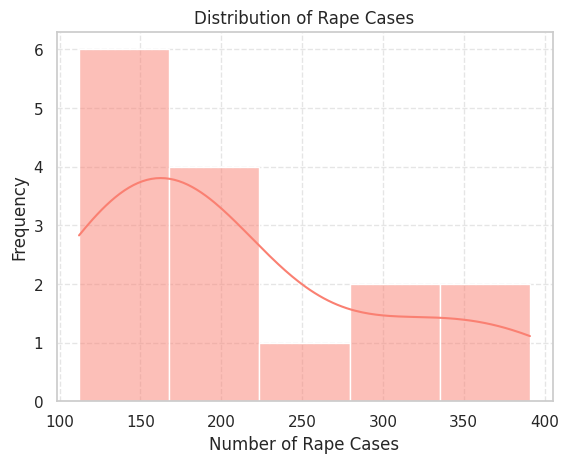

In [65]:

sns.histplot(df["Rape"], kde=True, color="salmon")
plt.title("Distribution of Rape Cases")
plt.xlabel("Number of Rape Cases")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We see the value of rape cases is maximum at frequency 2 which is 390 and it is right skewed.

right skew: mean > median

In [76]:
# Calculate skewness using the skew() function
skewness = stats.skew(df['Rape'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df['Rape'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

Skewness: 0.8405529927008097
Kurtosis: 2.335420293533764


Presence of slightly negative skewness

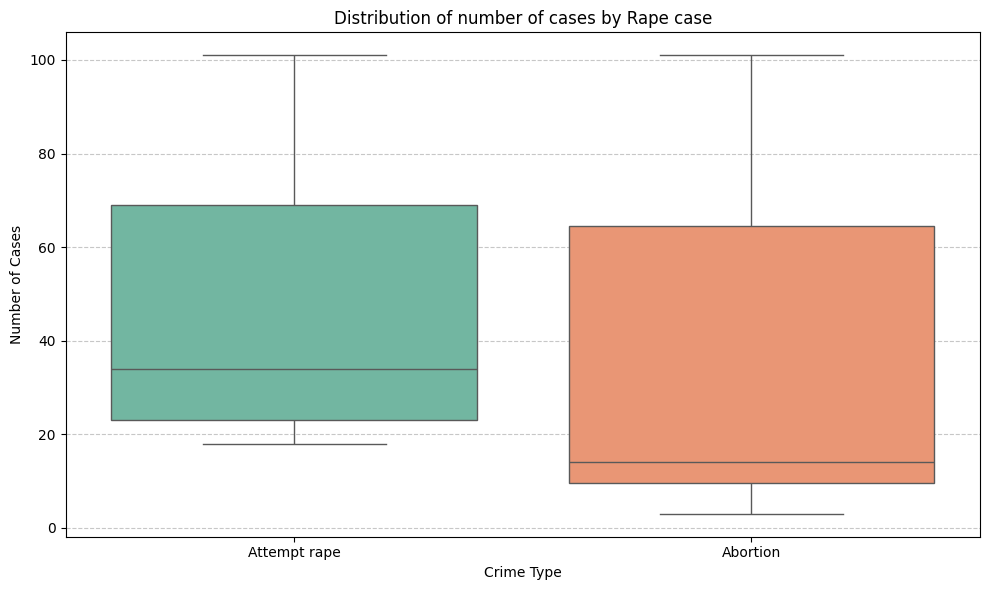

In [26]:
# Reshape the DataFrame for Seaborn (long format)
df_long = df[["Attempt rape", "Abortion"]].melt(var_name="Crime Type", value_name="Number of Cases")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Crime Type", y="Number of Cases", data=df_long, palette="Set2")
plt.title("Distribution of number of cases by Rape case")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* The longer the box, the more dispersed the data - Attempt rape case have more disperesed data.
* Median line of a box plot lies outside of the box of a each other, there is likely to be a difference between the two groups.
* We see that the data point is not located outside the whiskers of the box plot thus presence of no outlier.


Here
* The thick black line inside each box represents the interquartile range (IQR) of the data, which contains the middle 50% of the data. (Non anemic have thicker lines)

* The width of the box at each value represents the probability density of the data at that value. Wider sections of the violin indicate that more data points are clustered around that value.

# Statistical test

## t-test

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. In our case, we are using a t-test to determine whether there is a significant difference in the mean rape case and abortion case.

As we see Rape case have negaive skewness but t-test asumes have normal distribution. So before performing t-test, we  would be taking the logarithm of the data, which can help to reduce the skewness.


In [32]:
df_stat = df2.copy()
df_stat.head()

,Fiscal Year,Rape,Attempt rape,Trafficking,Abortion,Polygamy,Child marriage,Domestic violence,Total
0,1996,112,34,117,74,101,5,337,780
1,1997,181,34,130,101,135,3,228,812
2,1998,141,18,110,81,96,1,432,879
3,1999,186,33,120,89,96,5,711,1240
4,2000,122,35,92,55,75,1,449,829


In [33]:
# Perform independent T-test
t_stat, p_value = ttest_ind(df["Rape"], df["Abortion"], equal_var=False)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Significant difference between Rape and Abortion cases.")
else:
    print("Result: No significant difference between Rape and Abortion cases.")

T-statistic: 7.031477523386299
P-value: 1.4582160653803093e-06
Result: Significant difference between Rape and Abortion cases.


t-statistic is positive, it suggests that the mean rape case is greater than the mean abortion case, and the difference is strong.

P value is very low than the significance level of 0.05 so it reject null hypothesis.

There is a statistically significant difference between the average number of rape and abortion cases. And because t-statistic is positive,thus the average number of rape cases is significantly higher than abortion cases.

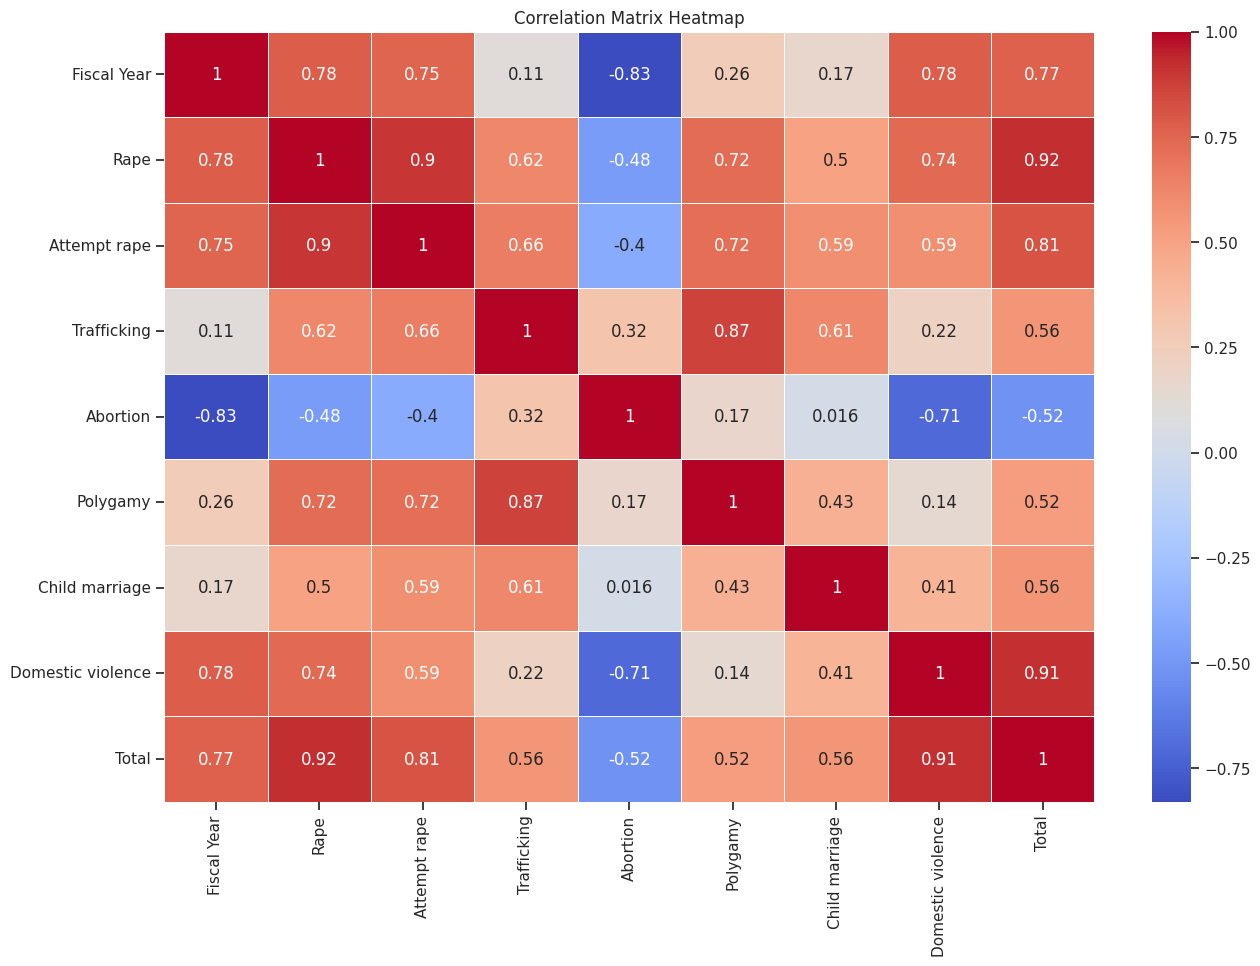

In [34]:
# # One-Hot Encoding for Correlation Matrix
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In above correlation matrix we painted the number so it will be easy for use to see which are highly corelated vale close to 1

"Rape" and "Abortion" have a correlation of -0.48, which indicates a moderate negative correlation which means that as one increases, the other tends to decrease, though not strongly.

And in "rape case" and "child marriage" have value 0.5 which is above 0.25 and we can say that they are strong correlation.

# Findings

- The EDA successfully met the objective of identifying key trends and relationships in the crime dataset.
-  Mean rape case is 112, max rape case is 391 and average attempt rape case is 18.
- In 2008 there is high rape case that is 391 and in 1996 there is low rape case that is 112.
- Rape case constist of 65.6% more compare to Attempt rape case.
- Right skew: mean > median and presence of slightly negative skewness.
- A t-test between rape and abortion cases showed a statistically significant difference, with rape cases being significantly higher on average.
- The correlation between rape and abortion cases is **-0.48**, indicating a moderate negative relationship.
- The correlation between rape and child marriage is **0.50**, suggesting a moderate positive relationship.